In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
%matplotlib inline
import sys
sys.path.append('../')
from package_global_functions import *
from subprocess import call

extSSDpath = getExternalSSDpath()
if os.path.exists(extSSDpath):
    path = extSSDpath + getProjectFoldername() + '/det_sols_from_polynomial/res_files'
else:
    path = '/res_files'

### Code to add the pi0 coloumn to the grid

In [48]:
# add pi 0 to the grid
x = 2
q1, q2 = 7, 10
fsMesh = np.load(f'{path}/map_sym_q1_{q1}_q2_{q2}.npz')

xgrid_pi, ygrid_l = np.mgrid[0.0:0.5:complex(0,51), 0.0:0.99:complex(0,100)]
fsMeshAmp = np.empty([3, 51, 100])

# get solutions at pi == 0.0:
pi = 0.0
ls = ygrid_l[0]
fsp0 = [[1.0, ], [0.0, ], [0.0, ]]
for l in ls[1:]:
    call(f'python f0poly_sols_clean.py {pi} {pi} {q1} {q2} {l} -v > sols.dat', shell=True)
    sols = []
    with open('sols.dat', 'r') as file:
        for line in file.readlines():
            sols_i = [abs(float(f)) for f in line.split()]
            sols.append(sols_i)
    for i in range(3):
        fsp0[i].append(sols[1][i])
    
for i in range(3):
    fsMeshAmp[i][0] = np.array(fsp0[i])
    fsMeshAmp[i][1:] = fsMesh['fs'][i]

[0.10043885182868165, 1.0000000000000078]


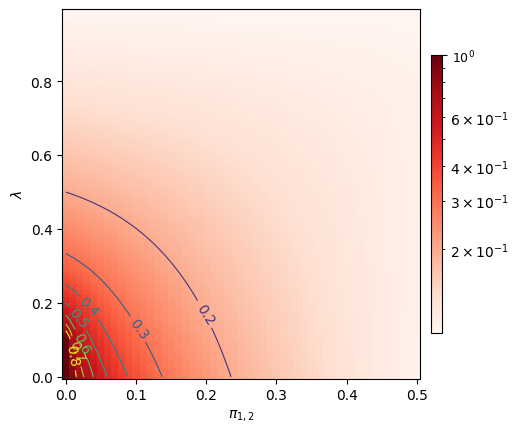

In [45]:
# single plot:
x = 2
q1, q2 = 7, 10
fsMesh = np.load(f'{path}/map_sym_q1_{q1}_q2_{q2}.npz')
Qmesh = fsMesh['fs'][2] - x*fsMesh['fs'][1]
sumXY = fsMesh['x'] + fsMesh['y']


fig, ax = plt.subplots(figsize=(5.6,4.8))
logColorbar = True
if logColorbar:
    # zLim = [np.min(fsMesh['fs'][0]), np.max(fsMesh['fs'][0])]
    # im = ax.pcolormesh(fsMesh['x'], fsMesh['y'], fsMesh['fs'][0], cmap='Reds', shading='nearest', norm = LogNorm(vmin=zLim[0], vmax=zLim[-1]))
    zLim = [np.min(fsMeshAmp[0]), np.max(fsMeshAmp[0])]
    print(zLim)
    im = ax.pcolormesh(xgrid_pi, ygrid_l, fsMeshAmp[0], cmap='Reds', shading='nearest', norm = LogNorm(vmin=zLim[0], vmax=zLim[-1]))
else:
    im = ax.pcolormesh(fsMesh['x'], fsMesh['y'], fsMesh['fs'][0], cmap='Reds', shading='nearest')
# con = ax.contour(fsMesh['x'], fsMesh['y'], fsMesh['fs'][0], levels=[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8], linewidths=0.8)
con = ax.contour(xgrid_pi, ygrid_l, fsMeshAmp[0], levels=[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8], linewidths=0.8)
ax.clabel(con)
ax.set_xlabel('$\pi_{1,2}$')
ax.set_ylabel('$\lambda$')
cb = fig.colorbar(im, ax=ax, aspect=25, shrink=0.75, pad=0.025)
cb.ax.tick_params(labelsize=9)

## fs side by side

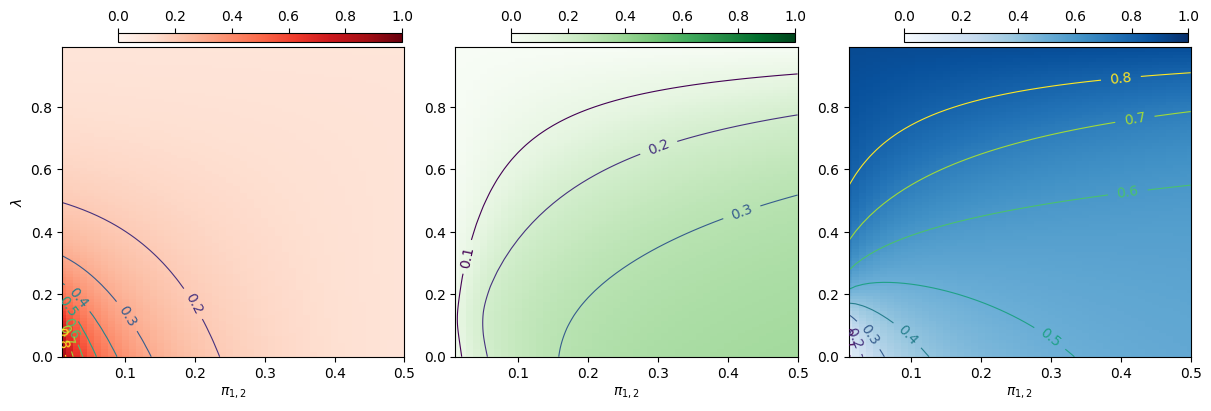

In [49]:
x = 2
q1, q2 = 9, 10
fsMesh = np.load(f'{path}/map_sym_q1_{q1}_q2_{q2}.npz')
Qmesh = fsMesh['fs'][2] - x*fsMesh['fs'][1]
sumXY = fsMesh['x'] + fsMesh['y']

fig, ax = plt.subplots(1,3,figsize=(12, 4), constrained_layout=True)
fs_cmaps = ['Reds', 'Greens', 'Blues']

for i in range(3):
    ax[i].set_xlim(0.01, 0.5)
    ax[i].set_ylim(0.00, 0.99)
    ax[i].set_xlabel('$\pi_{1,2}$')
ax[0].set_ylabel('$\lambda$')

for i,cmap in enumerate(fs_cmaps):
    # im = ax[i].pcolormesh(fsMesh['x'], fsMesh['y'], fsMesh['fs'][i], vmin =0, vmax =1, cmap=cmap, shading='nearest', rasterized=True)
    # con = ax[i].contour(fsMesh['x'], fsMesh['y'], fsMesh['fs'][i], levels=[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8], linewidths=0.8)
    im = ax[i].pcolormesh(xgrid_pi, ygrid_l, fsMeshAmp[i], vmin =0, vmax =1, cmap=cmap, shading='nearest', rasterized=True)
    con = ax[i].contour(xgrid_pi, ygrid_l, fsMeshAmp[i], levels=[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8], linewidths=0.8)
    fig.colorbar(im, ax=ax[i], location='top', fraction=0.05, aspect=35, pad=0.02, shrink=0.83, anchor=(0.96, 1.0))
    ax[i].clabel(con)

fig.savefig(f'fs_cmaps_isolines_sym_pi_q1_{q1}_q2_{q2}.png')


## Consensus single plot:

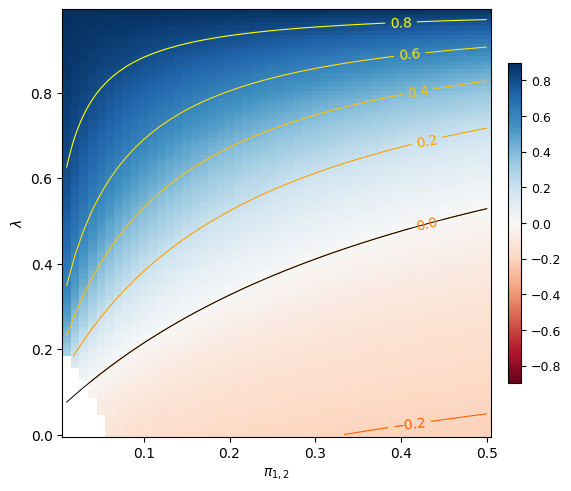

In [25]:
# single Q plot:
x = 2
q1, q2 = 7, 10
fsMesh = np.load(f'{path}/map_sym_q1_{q1}_q2_{q2}.npz')
Qmesh = fsMesh['fs'][2] - x*fsMesh['fs'][1]
sumXY = fsMesh['x'] + fsMesh['y']

fig, ax = plt.subplots(figsize=(5.6,4.8), constrained_layout=True)

# mask the region where f_0 >= 0.5:
# for i in len(fsMesh['x'][:,0]):
#     for j in len(fsMesh['y'][0,:]):
#         if fsMesh['fs'][0][i,j] >= 0.5:
#             ...
zeros = np.zeros(Qmesh.shape)
nans = np.empty(Qmesh.shape)
nans[:] = np.nan
Qmesh_masked = np.where(fsMesh['fs'][0] > 0.5, nans, Qmesh)

maxval = np.max(abs(Qmesh))
zLim = [-maxval, maxval]

# im = ax.pcolormesh(fsMesh['x'], fsMesh['y'], Qmesh, cmap='RdBu', shading='nearest', vmin=zLim[0], vmax=zLim[1])
im_masked = ax.pcolormesh(fsMesh['x'], fsMesh['y'], Qmesh_masked, cmap='RdBu', shading='nearest', vmin=zLim[0], vmax=zLim[1])
con = ax.contour(fsMesh['x'], fsMesh['y'], Qmesh_masked, levels=[-0.8, -0.6, -0.2, 0.0, 0.2, 0.4, 0.6, 0.8], linewidths=0.8, cmap='autumn')
ax.clabel(con)
# tline = pd.read_csv(f'{path}/Tline_sym_pis_q1_{float(q1)}_q2_{float(q2)}_f2_{int(x)}f1.csv')
# tline = tline.query('pi >= 0.01')
# ax.plot(tline['pi'], tline['lambda'], color='xkcd:black', lw=0.7)
ax.set_xlabel('$\pi_{1,2}$')º       
ax.set_ylabel('$\lambda$')
cb = fig.colorbar(im, ax=ax, aspect=25, shrink=0.75, pad=0.025)
cb.ax.tick_params(labelsize=9)
fig.savefig(f'Q_cmap_isolines_sym_pi_q1_{q1}_q2_{q2}.png')

# Asymmetric pi

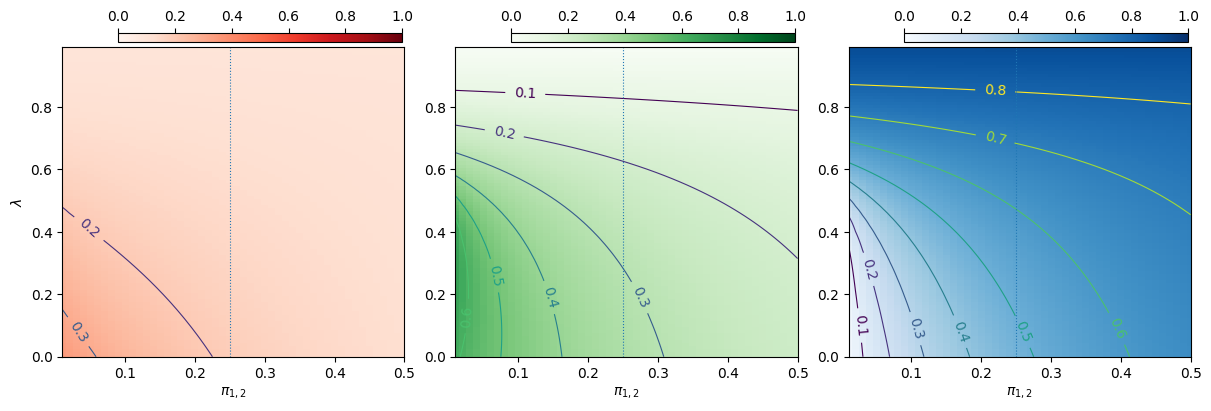

In [3]:
x = 2
pi1, q1, q2 = 0.25, 7, 10
fsMesh = np.load(f'{path}/map_asym_fixPi1_q1_{q1}_q2_{q2}_pi1_{pi1}.npz')
Qmesh = fsMesh['fs'][2] - x*fsMesh['fs'][1]
sumXY = fsMesh['x'] + fsMesh['y']

fig, ax = plt.subplots(1,3,figsize=(12, 4), constrained_layout=True)
fs_cmaps = ['Reds', 'Greens', 'Blues']

for i in range(3):
    ax[i].set_xlim(0.01, 0.5)
    ax[i].set_ylim(0.00, 0.99)
    ax[i].set_xlabel('$\pi_{1,2}$')
ax[0].set_ylabel('$\lambda$')

for i,cmap in enumerate(fs_cmaps):
    im = ax[i].pcolormesh(fsMesh['x'], fsMesh['y'], fsMesh['fs'][i], vmin =0, vmax =1, cmap=cmap, shading='nearest', rasterized=True)
    con = ax[i].contour(fsMesh['x'], fsMesh['y'], fsMesh['fs'][i], levels=[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8], linewidths=0.8)
    fig.colorbar(im, ax=ax[i], location='top', fraction=0.05, aspect=35, pad=0.02, shrink=0.83, anchor=(0.96, 1.0))
    ax[i].clabel(con)
    ax[i].axvline(0.25, 0, 1, ls=':', lw=0.8)

fig.savefig(f'fs_cmaps_isolines_asym_fixPi1_q1_{q1}_q2_{q2}_pi1_{pi1}.png')